### WIP Methylation Statistical Analysis

This code analyzes a multi-tissue DNA methylation dataset from mice, sourced from ['Multi-tissue DNA methylation age predictor in mouse'](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1203-5). It calculates average methylation rate, depth, and identifies tissue-specific and age-related differentiations in the samples. By employing  statistical techniques, this code will provide valuable insights into DNA methylation patterns and their association with aging processes. 

In [1]:
import gzip
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from typing import Tuple, List
from tabulate import tabulate

In [2]:
pd.set_option('display.max_rows', None)
directory = 'data/GSE93957_RAW/'

### Load Data & Build Dataframe

The build_df function generates a pandas DataFrame from a specified sample name. It initializes an empty DataFrame and defines column names. It iterates through files in the directory, checking for gzip format and matching sample name. Data is read using read_csv, with tab as separator, and stored in a temporary DataFrame. If the main DataFrame is empty, the data is directly assigned. The function returns the compiled DataFrame from matching files.

In [3]:

sample_list = ["Lung", "Heart", "Liver", "Cortex"]

def build_df(filename) -> pd.DataFrame:
    # Create empty DataFrame to be filled
    df = pd.DataFrame()
    columns_names = ['chromosome', 's_loc', 'e_loc', 'methyl_rate', 's_depth', 'e_depth']

    file_path = os.path.join(directory, filename)
    # Open the gzipped file in text mode
    with gzip.open(file_path, 'rt') as file:  
        print(file_path)
        df = pd.read_csv(file_path, sep="\t", header=None, names=columns_names, low_memory=False)
      
    return df

### Define Functions to parse data

In [4]:
def build_result(test = False):
    column_names = ['id', 'age', 'tissue', 'num_sites', 'ave depth', 'ave methylation', 'ave methylation > 2 depth', 'ave methylation > 5 depth']
    result = pd.DataFrame(columns=column_names)
    
    
    if not test:
        for filename in os.listdir(directory):
            _build_result_helper(filename, result)
    else: 
        filename = "GSM2465667_M04NB_1wk_Liver.cov.txt.gz"
        _build_result_helper(filename, result)
        
    return result

def _build_result_helper(filename, result):
    df = build_df(filename)
    length = len(df)
    depth = (df['s_depth'] + df['e_depth']).mean()
    mean = df['methyl_rate'].mean()
    
    # Get the average methylation for rows with read_count >= 2 & read_count <= 100
    df = df.drop(df[df['e_depth'] + df['s_depth'] < 2].index)
    df = df.drop(df[df['e_depth'] + df['s_depth'] > 100].index)
    two_depth_mean = df['methyl_rate'].mean()

    # Get the average methylation for rows with read_count >= 5 & read_count <= 100
    df = df.drop(df[df['e_depth'] + df['s_depth'] < 5].index)
    five_depth_mean = df['methyl_rate'].mean()

    # Split the filename into id and age_sample
    splits = filename.split("_")
    id = splits[0]+"_"+splits[1]
    age = splits[2]
    tissue = splits[3].split(".")[0]
    result.loc[len(result)] = [id, age, tissue, length, depth, mean, two_depth_mean, five_depth_mean]


### Load the data and parse the results

Parsing through all the data takes about two minutes.

In [5]:
# Perform statistical analysis and build a 'result DataFrame' that will be saved
df = build_result()

data/GSE93957_RAW/GSM2465633_M00018724_27wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465619_M00018362_41wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465667_M04NB_1wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465627_M00018381_41wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465631_M00018724_27wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465653_M02NB_1wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465636_M00018752_27wk_Heart.cov.txt.gz
data/GSE93957_RAW/GSM2465632_M00018724_27wk_Heart.cov.txt.gz
data/GSE93957_RAW/GSM2465637_M00018752_27wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465625_M00018363_41wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465668_M04NB_1wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465662_M0420527_14wk_Heart.cov.txt.gz
data/GSE93957_RAW/GSM2465665_M04NB_1wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465642_M00018754_27wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465676_M0520522_14wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465621_M00018362_41wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465675_M0520522_14wk_Liv

In [6]:
df.sort_values("age", ignore_index=True, inplace=True)
# Display Results Table in ASCII format:
#pdtabulate=lambda df:tabulate(df,headers='keys',tablefmt='psql')
#print(pdtabulate(df))
df

,id,age,tissue,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
0,GSM2465674_M0520522,14wk,Heart,4719569,26.478823,38.266097,34.152285,34.951853
1,GSM2465658_M0420525,14wk,Heart,4650887,12.917845,39.010798,34.896987,36.529763
2,GSM2465673_M0520522,14wk,Cortex,3993331,12.758077,37.903837,36.610926,37.846018
3,GSM2465676_M0520522,14wk,Lung,3833871,12.380396,36.179557,35.632827,38.103973
4,GSM2465657_M0420525,14wk,Cortex,4205076,14.687372,38.739643,36.724608,38.331880
5,GSM2465663_M0420527,14wk,Liver,4239585,10.794067,38.554164,35.594224,36.769701
6,GSM2465660_M0420525,14wk,Lung,4143370,14.824189,36.765770,34.756769,36.027765
7,GSM2465661_M0420527,14wk,Cortex,4353542,19.095015,38.545853,36.233313,37.388675
8,GSM2465675_M0520522,14wk,Liver,3984791,9.920883,37.102108,35.713960,37.235556
9,GSM2465664_M0420527,14wk,Lung,4017025,14.191690,36.445273,35.236357,37.021787


In [7]:
df[(df['age']=='27wk') & (df['tissue']=='Cortex')]

,id,age,tissue,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
26,GSM2465635_M00018752,27wk,Cortex,4189271,17.318348,38.355115,36.506813,37.901619
27,GSM2465639_M00018754,27wk,Cortex,4182114,15.634243,38.888374,37.268956,39.113288
29,GSM2465643_M0112371,27wk,Cortex,3980861,13.733747,37.598453,36.490056,37.380998
34,GSM2465669_M0512375,27wk,Cortex,4136638,15.853547,37.601744,35.818608,35.867736
38,GSM2465631_M00018724,27wk,Cortex,4086565,15.372909,38.633424,37.273794,39.312597


In [8]:
# Save results
df.to_csv('result.csv', index=False)

## Methylation rates by age
Lets calculate the average methylation rate for each age group

In [9]:
column_names = ['age', 'num_sites', 'ave depth', 'ave methylation', 'ave methylation > 2 depth', 'ave methylation > 5 depth']
age_df = pd.DataFrame(columns=column_names)

age_list = df['age'].unique()
for age in age_list:
    num_sites = df[df['age'] == age]['num_sites'].sum()
    ave_depth = df[df['age'] == age]['ave depth'].mean()
    ave_meth = df[df['age'] == age]['ave methylation'].mean()
    ave_meth_2 = df[df['age'] == age]['ave methylation > 2 depth'].mean()
    ave_meth_5 = df[df['age'] == age]['ave methylation > 5 depth'].mean()
    age_df.loc[len(age_df.index)] = [age, num_sites, ave_depth, ave_meth, ave_meth_2, ave_meth_5]

age_df


,age,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
0,14wk,50404726,14.369817,37.654923,35.475103,36.922818
1,1wk,57377240,14.816588,35.822928,34.060010,35.395738
2,27wk,80234281,12.114445,37.430929,35.919573,37.879692
3,41wk,62259996,13.657896,37.748076,35.579985,37.132225


In [10]:
print(age_df['ave methylation'].mean())
print(age_df['ave methylation > 2 depth'].mean())
print(age_df['ave methylation > 5 depth'].mean())

37.16421412916215
35.2586676065261
36.832618125618296


grouped_data = df.groupby('tissue')['ave'].apply(list)

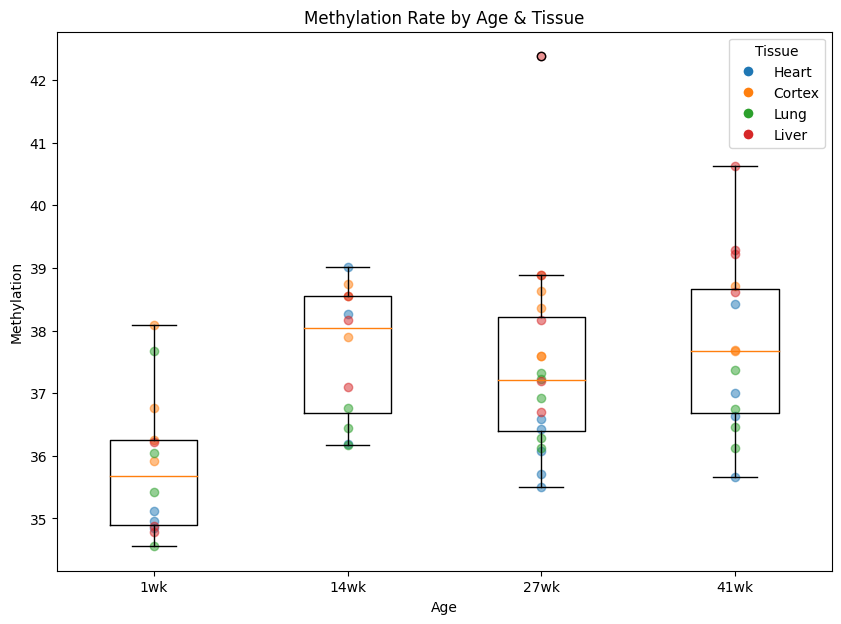

In [45]:
# fig, ax = plt.subplot()

# Setup overall figure and add a single plot to it
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot()




# Convert the df into series and plot said series to boxplots
age_groups = ['1wk', '14wk', '27wk', '41wk']
box_data = df.groupby('age', sort=False)['ave methylation'].apply(list)
scatter_data = [df[df['age'] == age]['ave methylation'] for age in age_groups]
data = box_data.values
data[0],data[1] = data[1],data[0]
bp = ax.boxplot(data)


# Create a list of unique tissues
unique_tissues = df['tissue'].unique()

# Assign a color to each tissue
color_map = {tissue: f'C{i}' for i, tissue in enumerate(unique_tissues)}

# Add scatter plots for each tissue
for i, age in enumerate(age_groups):
    age_data = df[df['age'] == age]
    for tissue in unique_tissues:
        scatter_data = age_data[age_data['tissue'] == tissue]['ave methylation']
        scatter_x = [i+1] * len(scatter_data)
        ax.scatter(scatter_x, scatter_data, color=color_map[tissue], alpha=0.5)

# Set x-axis labels
ax.set_xticks(range(1, len(age_groups)+1))
ax.set_xticklabels(age_groups)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Methylation')
ax.set_title('Methylation by Age')

# Create custom legend for tissues
scatter_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[tissue], markersize=8) for tissue in unique_tissues]
plt.legend(scatter_labels, unique_tissues, title='Tissue')

# Label Overall Figure and Display
plt.title('Methylation Rate by Age & Tissue')
plt.show();



In [44]:
from pprint import pprint
test = box_data['1wk']
# test[len(test)//2]
pprint(test)
# box_data.values[0]

[38.26609666247018,
 39.01079795324006,
 37.903836963333475,
 36.179556709564075,
 38.739642915142646,
 38.554163934595685,
 36.76577012432491,
 38.545852514027246,
 37.1021077758351,
 36.44527267850038,
 38.163835640426086,
 36.18213938453683]


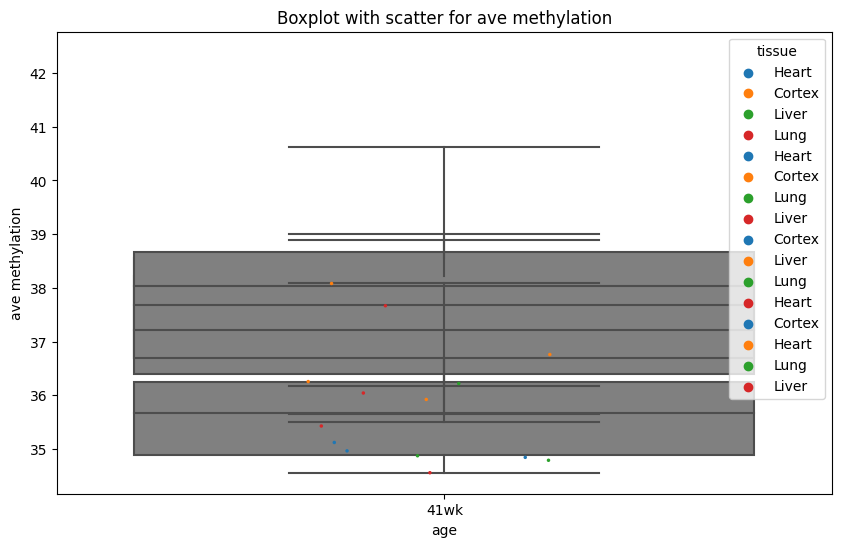

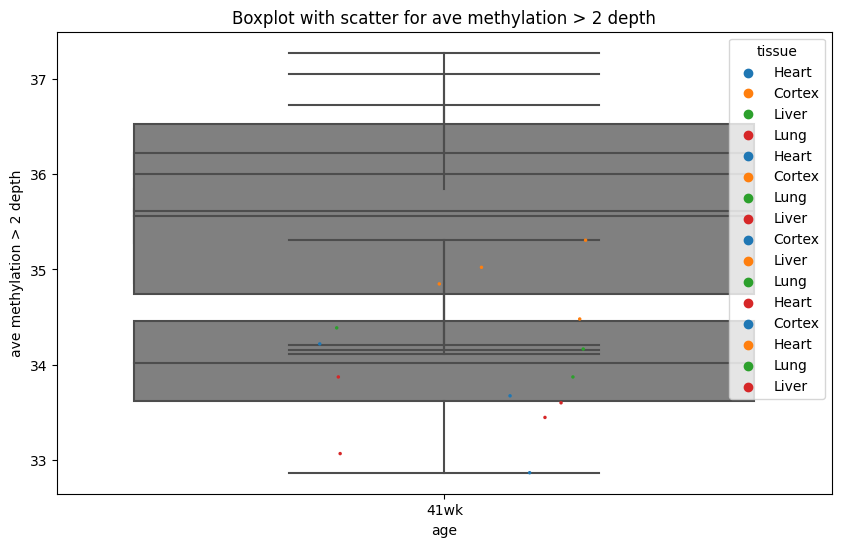

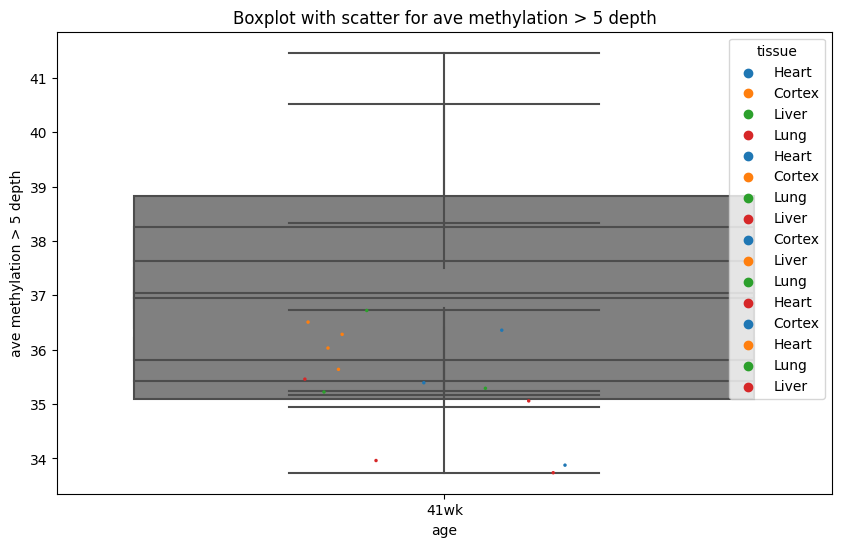

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

ages = ['1wk', '14wk', '27wk', '41wk']
methylation_columns = ['ave methylation', 'ave methylation > 2 depth', 'ave methylation > 5 depth']

for methylation_column in methylation_columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    for age in ages:
        # Subset to the age
        subset = df[df['age'] == age]
        # Make the boxplot
        sns.boxplot(x='age', y=methylation_column, data=subset, ax=ax, showfliers=False, color='gray')
        # Add scatterplot with color coding by 'tissue'
        sns.stripplot(x='age', y=methylation_column, data=subset, jitter=0.2, size=2.5, hue='tissue', ax=ax)
    plt.title(f"Boxplot with scatter for {methylation_column}")
    plt.show()
